In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # библиотека для расчетов
# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # для нормализации, стандартизации
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [81]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [82]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [83]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [85]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [87]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [88]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [89]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [90]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [92]:
# вместо обнуления признаков долготы и широты заполним их действительными значениями
# создадим словарь координат для пропущенных значений
coordinates = {
    'Fleming s Selection Hotel Wien City': (48.209389, 16.353491),
    'Hotel City Central': (48.213558, 16.379923),
    'Hotel Atlanta': (48.220310, 16.355881),
    'Maison Albar Hotel Paris Op ra Diamond': (48.875140, 2.323420),
    'Hotel Daniel Vienna': (48.188835, 16.383810),
    'Hotel Pension Baron am Schottentor': (48.216705, 16.359819),
    'Austria Trend Hotel Schloss Wilhelminenberg Wien': (48.206481, 16.363451),
    'NH Collection Barcelona Podium': (41.391430, 2.177890),
    'Derag Livinghotel Kaiser Franz Joseph Vienna': (48.245915, 16.341189),
    'City Hotel Deutschmeister': (48.220856, 16.366642),
    'Holiday Inn Paris Montmartre': (48.888860, 2.333190),
    'Hotel Park Villa': (48.233379, 16.345510),
    'Cordial Theaterhotel Wien': (48.209530, 16.351515),
    'Roomz Vienna': (48.186620, 16.420550),
    'Mercure Paris Gare Montparnasse': (48.839701, 2.323519),
    'Hotel Advance': (41.383263, 2.162926),
    'Renaissance Barcelona Hotel': (41.392429, 2.167500)
}
# теперь заполним эти значения
for i in coordinates:
    data.loc[data['hotel_name']==i,'lat'] = coordinates.get(i)[0]
    data.loc[data['hotel_name']==i,'lng'] = coordinates.get(i)[1]

In [93]:
# создадим новый признак показывающий сколько времени прошло от момента написания отзыва
data['review_days_old'] = (pd.to_datetime('07/18/2022') - pd.to_datetime(data['review_date'])).dt.days

In [94]:
# создадим два признака оценки положительного и отрицательного отзывов, выраженных в числовом виде
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.downloader.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

data['pos_compound'] = data['positive_review'].apply(lambda review: sent_analyzer.polarity_scores(review)['compound'])
data['neg_compound'] = data['negative_review'].apply(lambda review: sent_analyzer.polarity_scores(review)['compound'])
# доработаем недостатки данного метода: по негативным отзывам
data.loc[data['negative_review']=='No Negative','neg_compound'] = 0
data.loc[data['negative_review']==' Everything','neg_compound'] = -0.9
data.loc[data['negative_review']==' All','neg_compound'] = -0.7
data.loc[data['negative_review']==' No complaints','neg_compound'] = 0
data.loc[data['negative_review']==' No complaints ','neg_compound'] = 0
data.loc[data['negative_review']==' No','neg_compound'] = 0
data.loc[data['negative_review']==' Having to leave','neg_compound'] = 0
# доработаем недостатки данного метода: по позитивным отзывам
data.loc[data['positive_review']=='No Positive','pos_compound'] = 0
data.loc[data['positive_review']==' Not much','pos_compound'] = -0.5

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [95]:
# закодируем 9 самых частых тэгов
data['Leisure trip'] = data['tags'].apply(lambda tag: 1 if 'Leisure trip' in tag else 0)
data['Submitted from a mobile device'] = data['tags'].apply(lambda tag: 1 if 'Submitted from a mobile device' in tag else 0)
data['Couple'] = data['tags'].apply(lambda tag: 1 if 'Couple' in tag else 0)
data['Stayed 1 night'] = data['tags'].apply(lambda tag: 1 if 'Stayed 1 night' in tag else 0)
data['Stayed 2 nights'] = data['tags'].apply(lambda tag: 1 if 'Stayed 2 nights' in tag else 0)
data['Solo traveler'] = data['tags'].apply(lambda tag: 1 if 'Solo traveler' in tag else 0)
data['Stayed 3 nights'] = data['tags'].apply(lambda tag: 1 if 'Stayed 3 nights' in tag else 0)
data['Business trip'] = data['tags'].apply(lambda tag: 1 if 'Business trip' in tag else 0)
data['Group'] = data['tags'].apply(lambda tag: 1 if 'Group' in tag else 0)

In [96]:
# также создадим признак количества тегов
data['total_tags'] = data['tags'].apply(lambda x: len(x))

In [97]:
data.tail()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,Leisure trip,Submitted from a mobile device,Couple,Stayed 1 night,Stayed 2 nights,Solo traveler,Stayed 3 nights,Business trip,Group,total_tags
515733,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,1,1,0,0,1,0,0,0,1,116
515734,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,1,1,1,0,0,0,0,0,0,113
515735,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,0,0,0,1,0,1,0,1,0,75
515736,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,1,0,0,0,1,1,0,0,0,82
515737,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,...,1,0,1,0,0,0,0,0,0,70


In [98]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1489
lng                                             1489
sample                                             2
reviewer_score                                    38
review_days_old                               

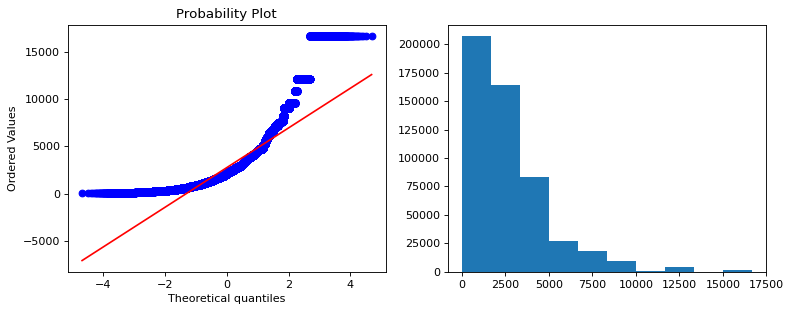

In [99]:
# проверю на нормальность распределения
# признак total_number_of_reviews
figure(figsize=(10, 4), dpi=80)
plt.subplot(1, 2, 1) 
stats.probplot(data['total_number_of_reviews'], plot=plt) 
plt.subplot(1, 2, 2) 
plt.hist(data['total_number_of_reviews'])
plt.tight_layout() 
plt.show()

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

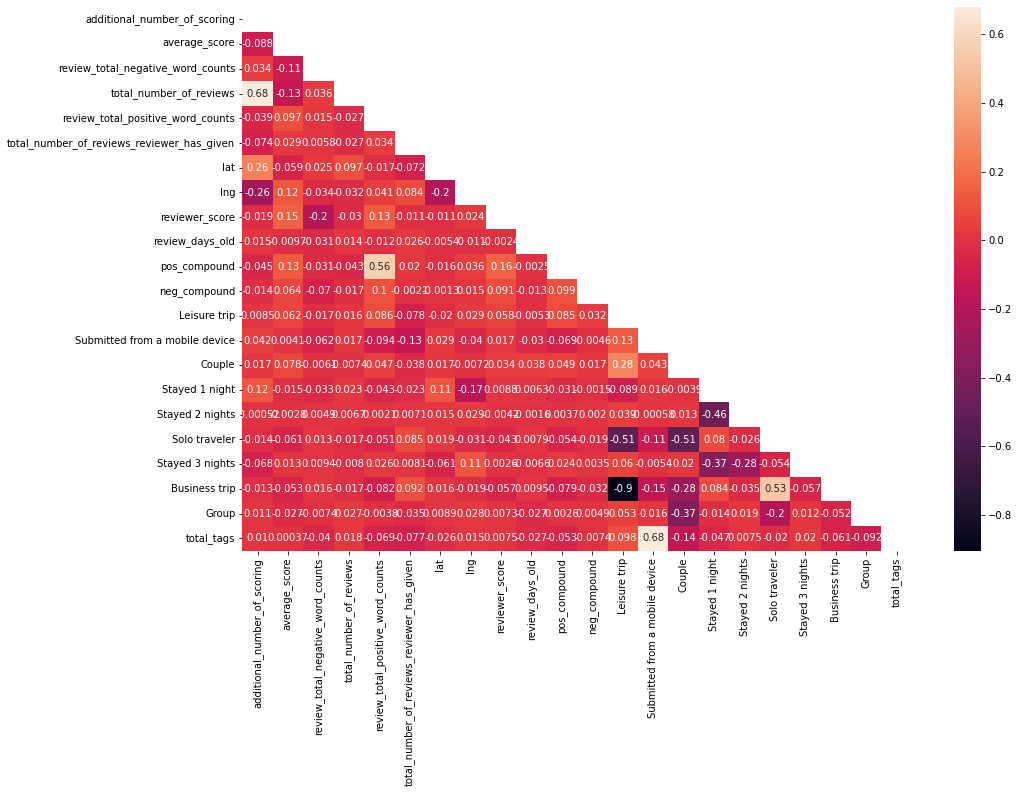

In [100]:
# Ни один признак не имеет нормального распределения. Только признак average_score можно приближенно считать нормально распределенным. Поэтому будем использовать метод корреляции Кендала
plt.rcParams['figure.figsize'] = (15,10)
matrix = np.triu(data.drop(['sample'], axis=1).corr())
sns.heatmap(data.drop(['sample'], axis=1).corr(method='kendall'), annot=True, mask=matrix)

Видим одну сильную корреляцию, ее нужно удалить! Но поскольку это бинарные признаки, то проверим еще раз с помощью метода Мэтьюса

In [101]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(data['Business trip'], data['Leisure trip'])

-0.9040337997914752

In [102]:
# сильная корреляция, поэтому удалим признак Business trip
data.drop('Business trip', axis=1, inplace=True)

Поработаем над нормализацией
Поскольку мы очистку от выбросов не производили, то для нормализации в этом случае лучше воспользоваться методом RobustScaler. Стандартизация в данном случае нам не подходит, потому что стандартизация предполагает, что признак распределён нормально, а наши признаки этим не страдают =).

In [104]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

data['additional_number_of_scoring'] = r_scaler.fit_transform(data[['additional_number_of_scoring']])
data['review_total_negative_word_counts'] = r_scaler.fit_transform(data[['review_total_negative_word_counts']])
data['total_number_of_reviews'] = r_scaler.fit_transform(data[['total_number_of_reviews']])
data['review_total_positive_word_counts'] = r_scaler.fit_transform(data[['review_total_positive_word_counts']])
data['total_number_of_reviews_reviewer_has_given'] = r_scaler.fit_transform(data[['total_number_of_reviews_reviewer_has_given']])
data['total_tags'] = r_scaler.fit_transform(data[['total_tags']])
data['lat'] = r_scaler.fit_transform(data[['lat']])
data['lng'] = r_scaler.fit_transform(data[['lng']])
data['review_days_old'] = r_scaler.fit_transform(data[['review_days_old']])

Номализацию признаков pos_compound и neg_compound считаю делать нет необходимости, поскольку значения этих признаков и так находятся в диапазоне (-1:1).

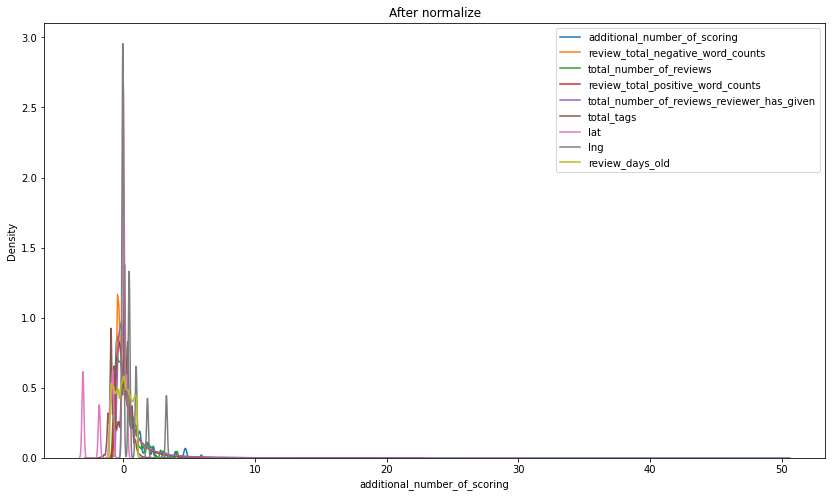

In [106]:
# посмотрим на график распределения после нормализации
fig, (ax1) = plt.subplots(ncols=1, figsize=(14, 8))
ax1.set_title('After normalize')

sns.kdeplot(data['additional_number_of_scoring'], ax=ax1, label ='additional_number_of_scoring')
sns.kdeplot(data['review_total_negative_word_counts'], ax=ax1, label ='review_total_negative_word_counts')
sns.kdeplot(data['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
sns.kdeplot(data['review_total_positive_word_counts'], ax=ax1, label ='review_total_positive_word_counts')
sns.kdeplot(data['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='total_number_of_reviews_reviewer_has_given')
sns.kdeplot(data['total_tags'], ax=ax1, label ='total_tags')
sns.kdeplot(data['lat'], ax=ax1, label ='lat')
sns.kdeplot(data['lng'], ax=ax1, label ='lng')
sns.kdeplot(data['review_days_old'], ax=ax1, label ='review_days_old')
# sns.kdeplot(df['pos_compound'], ax=ax1, label ='pos_compound')
# sns.kdeplot(df['neg_compound'], ax=ax1, label ='neg_compound')
plt.legend()

In [107]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  float64
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  float64
 3   total_number_of_reviews                     515738 non-null  float64
 4   review_total_positive_word_counts           515738 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 6   lat                                         515738 non-null  float64
 7   lng                                         515738 non-null  float64
 8   sample                                      515738 non-null  int64  
 9   reviewer_score                              515738 non-null  float64
 

In [109]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [110]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [111]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 21), (386803, 21), (386803, 20), (309442, 20), (77361, 20))

In [112]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [113]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [114]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


In [115]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8821088043624783


<AxesSubplot:>

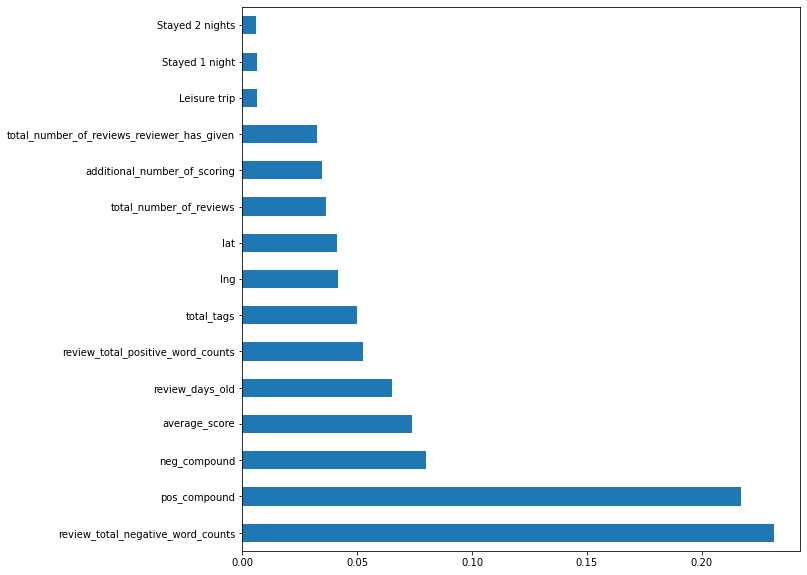

In [116]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [117]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,reviewer_score,review_days_old,...,neg_compound,Leisure trip,Submitted from a mobile device,Couple,Stayed 1 night,Stayed 2 nights,Solo traveler,Stayed 3 nights,Group,total_tags
77616,-0.509165,8.5,-0.190476,-0.640294,-0.352941,-0.142857,-0.796908,0.461716,0.0,0.474432,...,0.0000,1,0,1,0,0,0,1,0,-0.857143
104943,0.150713,8.4,0.333333,0.491843,0.000000,1.428571,-3.063300,0.431499,0.0,-0.400568,...,0.4404,1,0,0,0,0,0,0,0,-0.685714
65078,1.095723,8.8,-0.333333,0.258564,-0.470588,-0.285714,0.002535,0.000000,0.0,-1.000000,...,0.0000,1,1,0,1,0,0,0,1,0.314286
116899,1.739308,8.3,-0.428571,1.039967,-0.352941,1.000000,-0.002607,-0.028349,0.0,1.056818,...,0.0000,1,1,1,0,1,0,0,0,0.142857
67735,3.034623,8.1,-0.285714,2.027325,3.764706,0.428571,-0.000283,-0.042450,0.0,0.457386,...,-0.2960,1,1,1,1,0,0,0,0,0.114286
79674,-0.217923,6.9,0.095238,-0.101958,-0.058824,-0.285714,-0.001556,-0.039541,0.0,-0.218750,...,-0.1779,0,1,0,0,0,1,0,0,0.114286
44512,1.287169,8.0,0.857143,1.095432,-0.529412,4.142857,0.265669,0.978613,0.0,0.068182,...,-0.6704,1,1,1,1,0,0,0,0,-0.142857
30633,-0.036660,8.8,-0.428571,-0.263051,0.294118,0.571429,-0.000527,-0.026754,0.0,-0.571023,...,0.0000,0,1,1,1,0,0,0,0,0.085714
34586,1.331976,8.1,1.142857,0.690049,1.117647,-0.142857,0.001323,-0.010699,0.0,-0.386364,...,0.6486,0,1,1,0,1,0,0,0,-0.485714
127242,-0.450102,8.6,0.238095,-0.465742,1.411765,3.142857,-0.995139,3.280455,0.0,0.693182,...,0.4215,1,0,1,0,1,0,0,0,-0.628571


In [118]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [119]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [120]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.4s finished


In [121]:
predict_submission

array([8.515, 7.177, 8.624, ..., 8.204, 9.611, 6.904])

In [122]:
list(sample_submission)

['reviewer_score', 'id']

In [123]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.515,488440
1,7.177,274649
2,8.624,374688
3,9.590,404352
4,9.556,451596
5,8.977,302161
6,7.747,317079
7,7.593,13963
8,8.228,159785
9,7.581,195089
